# 온라인쇼핑동향조사 데이터 분석

- 출처 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10041&conn_path=I2


## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
# 한글화
# 코랩에서만 적용
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum # 폰트 설치

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager as fm, rc
import matplotlib as mpl
%matplotlib inline
# 한글 처리
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties( fname=path, size=10 )
rc( 'font', family=font.get_name() )
mpl.font_manager._rebuild()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#온라인 쇼핑 데이터 불러오기
path = '/content/drive/My Drive/Phoenix/PJM/OnlineShoppingData/onlineshopping.csv'
OnlineShopping = pd.read_csv(path, encoding='CP949')
OnlineShopping.head(10)

,[A]상품군별,상품군별,[B]범위별,범위별,[Item]항목,항목,단위,2018. 01 월,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,2018. 07 월,2018. 08 월,2018. 09 월,2018. 10 월,2018. 11 월,2018. 12 월,2019. 01 월,2019. 02 월,2019. 03 월,2019. 04 월,2019. 05 월,2019. 06 월,2019. 07 월,2019. 08 월,2019. 09 월,2019. 10 월,2019. 11 월,2019. 12 월,2020. 01 월,2020. 02 월,2020. 03 월,2020. 04 월,2020. 05 월,Unnamed: 36
0,0,합계,0,계,T20[14STD05057],거래액[백만원],백만원,9027008,8207296,9375766,9034274,9363224,8965075,9653420,9270381,9137279,10016442,10574144,10689701,10722987,9607307,11259178,10671636,11253413,10604209,11197264,11278634,11261479,11871192,12852096,12684652,12304762,11963252,12624728,12055233,12722071,NaN
1,0,합계,10,종합몰,T20[14STD05057],거래액[백만원],백만원,5934657,5468657,6269973,6039799,6268453,6011523,6494362,6107050,6108059,6754249,7150467,7124412,7111089,6286441,7571660,7065292,7533138,6949152,7249561,7293814,7450215,7843963,8453879,8264596,8061340,8298602,8794625,8338721,8771730,NaN
2,0,합계,20,전문몰,T20[14STD05057],거래액[백만원],백만원,3092351,2738639,3105793,2994475,3094771,2953552,3159058,3163331,3029220,3262193,3423677,3565289,3611898,3320866,3687518,3606344,3720275,3655057,3947703,3984820,3811264,4027229,4398217,4420056,4243422,3664650,3830103,3716512,3950341,NaN
3,1,컴퓨터 및 주변기기,0,계,T20[14STD05057],거래액[백만원],백만원,511674,453408,504061,409054,404235,371844,404250,418905,382179,419744,468166,501362,558184,540004,530200,466943,437182,386397,440060,444873,433036,442244,524269,550826,550217,616468,687759,645091,590076,NaN
4,1,컴퓨터 및 주변기기,10,종합몰,T20[14STD05057],거래액[백만원],백만원,354076,322160,346880,278377,276853,256035,281841,288936,267238,281410,328515,340479,380816,383755,377066,317721,306788,257122,300894,300070,297539,298233,371037,372962,376201,433042,468165,441866,373734,NaN
5,1,컴퓨터 및 주변기기,20,전문몰,T20[14STD05057],거래액[백만원],백만원,157598,131248,157181,130677,127382,115809,122409,129969,114941,138334,139651,160883,177368,156249,153134,149222,130394,129275,139166,144803,135497,144011,153232,177864,174016,183426,219594,203225,216342,NaN
6,2,가전·전자·통신기기,0,계,T20[14STD05057],거래액[백만원],백만원,858256,770401,946627,945259,1026133,963674,1188194,960593,792407,989521,1182355,1043945,1074831,1004697,1343708,1157347,1315707,1207535,1263648,1221816,1123198,1231229,1379205,1247059,1158549,1392368,1480356,1377532,1590990,NaN
7,2,가전·전자·통신기기,10,종합몰,T20[14STD05057],거래액[백만원],백만원,770198,691681,839705,855166,931725,875827,1088967,852645,712763,883715,1005001,902122,920573,858888,1143560,972484,1138518,1048731,1084065,1033626,969159,1018376,1164991,1043596,970848,1135703,1203323,1155617,1375886,NaN
8,2,가전·전자·통신기기,20,전문몰,T20[14STD05057],거래액[백만원],백만원,88058,78720,106922,90093,94408,87847,99227,107948,79644,105806,177354,141823,154258,145809,200148,184863,177189,158804,179583,188190,154039,212853,214214,203463,187701,256665,277033,221915,215104,NaN
9,3,서적,0,계,T20[14STD05057],거래액[백만원],백만원,171254,147783,191597,144169,129125,117353,148060,149224,128183,131744,142405,168500,175198,155592,198536,148837,134142,123125,157275,155439,148073,134624,148213,179658,172311,191346,255531,206282,175015,NaN


## 데이터 확인 및 전처리

In [6]:
# 온라인 쇼핑 데이터프레임 컬럼<->인덱스
OnlineShopping = OnlineShopping.T

In [7]:
OnlineShopping.shape

(37, 72)

In [8]:
OnlineShopping.index

Index(['[A]상품군별', '상품군별', '[B]범위별', '범위별', '[Item]항목', '항목', '단위',
       '2018. 01 월', '2018. 02 월', '2018. 03 월', '2018. 04 월', '2018. 05 월',
       '2018. 06 월', '2018. 07 월', '2018. 08 월', '2018. 09 월', '2018. 10 월',
       '2018. 11 월', '2018. 12 월', '2019. 01 월', '2019. 02 월', '2019. 03 월',
       '2019. 04 월', '2019. 05 월', '2019. 06 월', '2019. 07 월', '2019. 08 월',
       '2019. 09 월', '2019. 10 월', '2019. 11 월', '2019. 12 월', '2020. 01 월',
       '2020. 02 월', '2020. 03 월', '2020. 04 월', '2020. 05 월', 'Unnamed: 36'],
      dtype='object')

In [9]:
OnlineShopping.columns

RangeIndex(start=0, stop=72, step=1)

In [10]:
OnlineShopping.dtypes

0     object
1     object
2     object
3     object
4     object
       ...  
67    object
68    object
69    object
70    object
71    object
Length: 72, dtype: object

In [11]:
OnlineShopping.loc['상품군별']

0             합계
1             합계
2             합계
3     컴퓨터 및 주변기기
4     컴퓨터 및 주변기기
         ...    
67         기타서비스
68         기타서비스
69            기타
70            기타
71            기타
Name: 상품군별, Length: 72, dtype: object

In [12]:
# 상품군별로 컬럼명 변경
OnlineShopping.columns = OnlineShopping.loc['상품군별']

In [13]:
OnlineShopping.columns

Index(['합계', '합계', '합계', '컴퓨터 및 주변기기', '컴퓨터 및 주변기기', '컴퓨터 및 주변기기',
       '가전·전자·통신기기', '가전·전자·통신기기', '가전·전자·통신기기', '서적', '서적', '서적', '사무·문구',
       '사무·문구', '사무·문구', '의복', '의복', '의복', '신발', '신발', '신발', '가방', '가방', '가방',
       '패션용품 및 액세서리', '패션용품 및 액세서리', '패션용품 및 액세서리', '스포츠·레저용품', '스포츠·레저용품',
       '스포츠·레저용품', '화장품', '화장품', '화장품', '아동·유아용품', '아동·유아용품', '아동·유아용품',
       '음·식료품', '음·식료품', '음·식료품', '농축수산물', '농축수산물', '농축수산물', '생활용품', '생활용품',
       '생활용품', '자동차 및 자동차용품', '자동차 및 자동차용품', '자동차 및 자동차용품', '가구', '가구', '가구',
       '애완용품', '애완용품', '애완용품', '여행 및 교통서비스', '여행 및 교통서비스', '여행 및 교통서비스',
       '문화 및 레저서비스', '문화 및 레저서비스', '문화 및 레저서비스', 'e쿠폰서비스', 'e쿠폰서비스', 'e쿠폰서비스',
       '음식서비스', '음식서비스', '음식서비스', '기타서비스', '기타서비스', '기타서비스', '기타', '기타', '기타'],
      dtype='object', name='상품군별')

In [14]:
OnlineShopping.head(10)
# 합계, 종합몰, 전문몰

상품군별,합계,합계,합계,컴퓨터 및 주변기기,컴퓨터 및 주변기기,컴퓨터 및 주변기기,가전·전자·통신기기,가전·전자·통신기기,가전·전자·통신기기,서적,서적,서적,사무·문구,사무·문구,사무·문구,의복,의복,의복,신발,신발,신발,가방,가방,가방,패션용품 및 액세서리,패션용품 및 액세서리,패션용품 및 액세서리,스포츠·레저용품,스포츠·레저용품,스포츠·레저용품,화장품,화장품,화장품,아동·유아용품,아동·유아용품,아동·유아용품,음·식료품,음·식료품,음·식료품,농축수산물,농축수산물,농축수산물,생활용품,생활용품,생활용품,자동차 및 자동차용품,자동차 및 자동차용품,자동차 및 자동차용품,가구,가구,가구,애완용품,애완용품,애완용품,여행 및 교통서비스,여행 및 교통서비스,여행 및 교통서비스,문화 및 레저서비스,문화 및 레저서비스,문화 및 레저서비스,e쿠폰서비스,e쿠폰서비스,e쿠폰서비스,음식서비스,음식서비스,음식서비스,기타서비스,기타서비스,기타서비스,기타,기타,기타
[A]상품군별,0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12,13,13,13,14,14,14,15,15,15,16,16,16,17,17,17,18,18,18,19,19,19,20,20,20,21,21,21,22,22,22,23,23,23
상품군별,합계,합계,합계,컴퓨터 및 주변기기,컴퓨터 및 주변기기,컴퓨터 및 주변기기,가전·전자·통신기기,가전·전자·통신기기,가전·전자·통신기기,서적,서적,서적,사무·문구,사무·문구,사무·문구,의복,의복,의복,신발,신발,신발,가방,가방,가방,패션용품 및 액세서리,패션용품 및 액세서리,패션용품 및 액세서리,스포츠·레저용품,스포츠·레저용품,스포츠·레저용품,화장품,화장품,화장품,아동·유아용품,아동·유아용품,아동·유아용품,음·식료품,음·식료품,음·식료품,농축수산물,농축수산물,농축수산물,생활용품,생활용품,생활용품,자동차 및 자동차용품,자동차 및 자동차용품,자동차 및 자동차용품,가구,가구,가구,애완용품,애완용품,애완용품,여행 및 교통서비스,여행 및 교통서비스,여행 및 교통서비스,문화 및 레저서비스,문화 및 레저서비스,문화 및 레저서비스,e쿠폰서비스,e쿠폰서비스,e쿠폰서비스,음식서비스,음식서비스,음식서비스,기타서비스,기타서비스,기타서비스,기타,기타,기타
[B]범위별,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20,0,10,20
범위별,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰,계,종합몰,전문몰
[Item]항목,T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057],T20[14STD05057]
항목,거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원],거래액[백만원]
단위,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원,백만원
2018. 01 월,9027008,5934657,3092351,511674,354076,157598,858256,770198,88058,171254,56287,114967,72870,45912,26958,964236,549847,414389,131568,89750,41818,186542,163851,22691,195299,161089,34210,230779,192335,38444,770908,660882,110026,295195,260995,34200,846822,690539,156283,251910,220796,31114,710430,60473

In [15]:
# 필요없는 데이터 없앰
OnlineShopping=OnlineShopping.iloc[7:-1,:]

In [16]:
# 결측치 확인
OnlineShopping.isnull( ).sum()

상품군별
합계            0
합계            0
합계            0
컴퓨터 및 주변기기    0
컴퓨터 및 주변기기    0
             ..
기타서비스         0
기타서비스         0
기타            0
기타            0
기타            0
Length: 72, dtype: int64

In [17]:
# 합계데이터만 남기기
OnlineShopping = OnlineShopping.iloc[:,[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69]]


In [18]:
OnlineShopping.shape

(29, 24)

In [19]:
# 데이터타입 int로 변경
cols = OnlineShopping.columns
for col in cols:
  OnlineShopping[col]=OnlineShopping[col].apply(lambda x:int(x))
OnlineShopping.dtypes

상품군별
합계             int64
컴퓨터 및 주변기기     int64
가전·전자·통신기기     int64
서적             int64
사무·문구          int64
의복             int64
신발             int64
가방             int64
패션용품 및 액세서리    int64
스포츠·레저용품       int64
화장품            int64
아동·유아용품        int64
음·식료품          int64
농축수산물          int64
생활용품           int64
자동차 및 자동차용품    int64
가구             int64
애완용품           int64
여행 및 교통서비스     int64
문화 및 레저서비스     int64
e쿠폰서비스         int64
음식서비스          int64
기타서비스          int64
기타             int64
dtype: object

In [20]:
OnlineShopping.head(2)

상품군별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2018. 01 월,9027008,511674,858256,171254,72870,964236,131568,186542,195299,230779,770908,295195,846822,251910,710430,77220,251892,72178,1491434,182387,105594,347457,73143,227959
2018. 02 월,8207296,453408,770401,147783,71721,825152,124447,178154,178379,200710,746376,268618,814658,289778,636039,65502,241563,60944,1246049,151838,129231,324245,57680,224621


In [21]:
OnlineShopping.index

Index(['2018. 01 월', '2018. 02 월', '2018. 03 월', '2018. 04 월', '2018. 05 월',
       '2018. 06 월', '2018. 07 월', '2018. 08 월', '2018. 09 월', '2018. 10 월',
       '2018. 11 월', '2018. 12 월', '2019. 01 월', '2019. 02 월', '2019. 03 월',
       '2019. 04 월', '2019. 05 월', '2019. 06 월', '2019. 07 월', '2019. 08 월',
       '2019. 09 월', '2019. 10 월', '2019. 11 월', '2019. 12 월', '2020. 01 월',
       '2020. 02 월', '2020. 03 월', '2020. 04 월', '2020. 05 월'],
      dtype='object')

In [22]:
# 인덱스명 변경
index_li=list()
for i in range(len(OnlineShopping.index)):
  index_li.append(f'{OnlineShopping.index[i][0:4]}-{OnlineShopping.index[i][-4:-2]}')
  

In [23]:
OnlineShopping.index = index_li
OnlineShopping.head(2)

상품군별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2018-01,9027008,511674,858256,171254,72870,964236,131568,186542,195299,230779,770908,295195,846822,251910,710430,77220,251892,72178,1491434,182387,105594,347457,73143,227959
2018-02,8207296,453408,770401,147783,71721,825152,124447,178154,178379,200710,746376,268618,814658,289778,636039,65502,241563,60944,1246049,151838,129231,324245,57680,224621


In [25]:
OnlineShopping[['합계','음·식료품']].to_csv('/content/drive/My Drive/Phoenix/PJM/회귀분석데이터/OnlineShopping.csv')

## 시각화


### 18-01~20-05 매출금액 변화


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


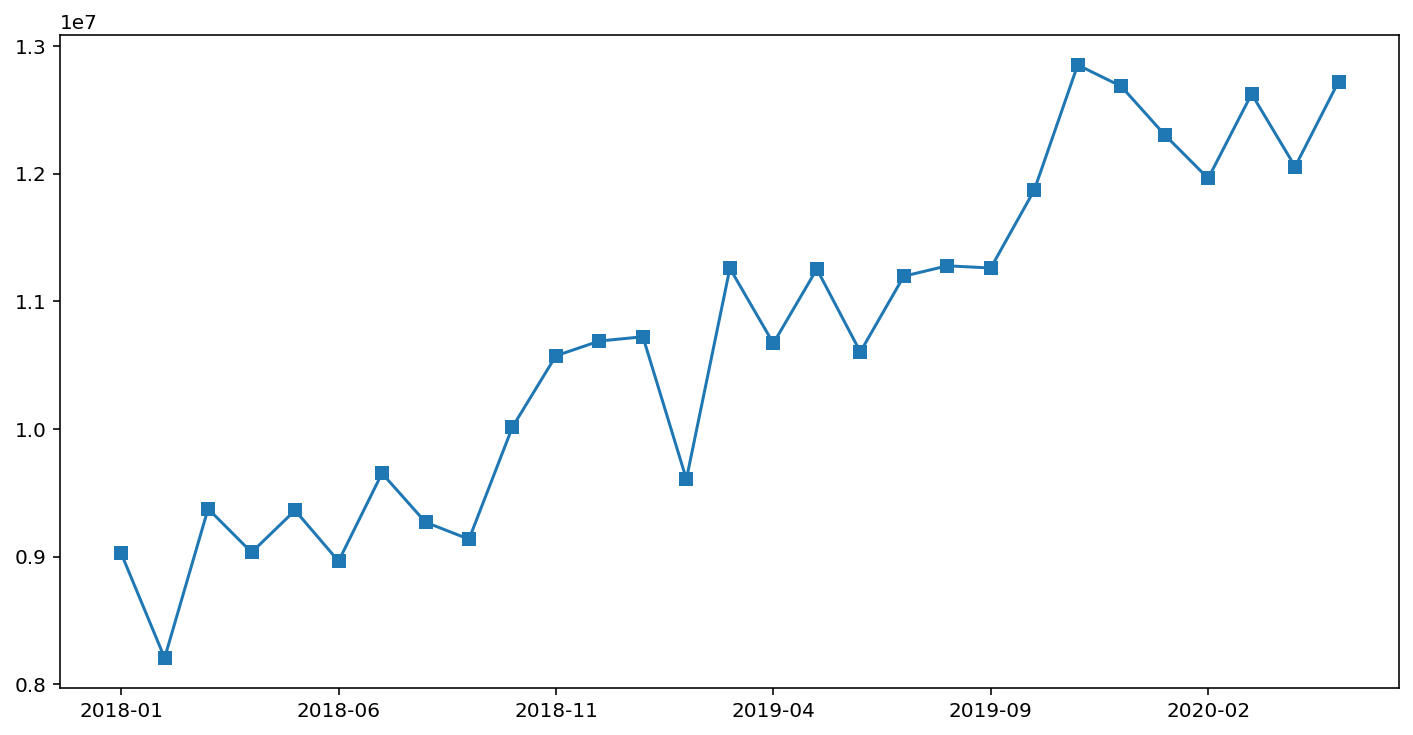

In [25]:
OnlineShopping.합계.plot(figsize=(12,6), marker='s')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54504 missing from current font.
  font.set_

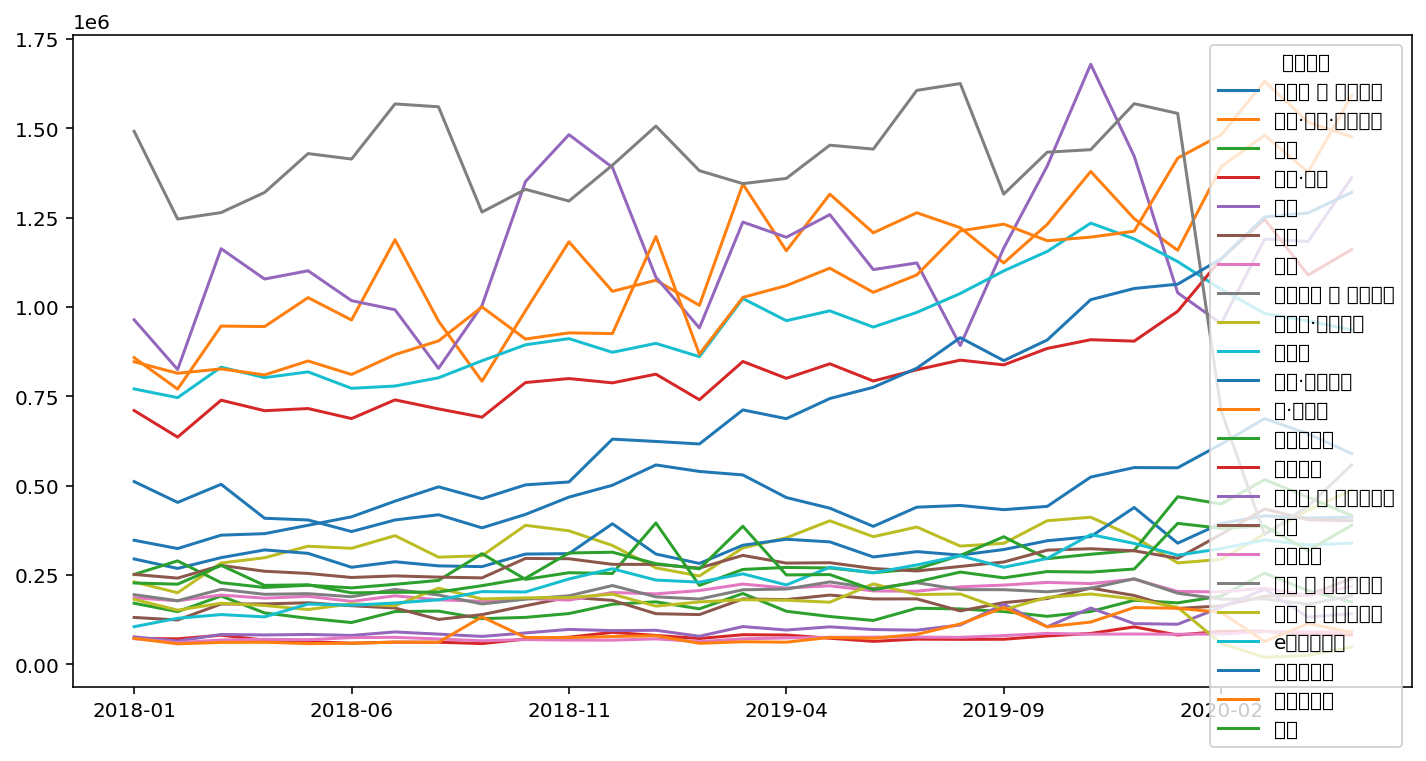

In [26]:
OnlineShopping.iloc[:,1:].plot(figsize=(12,6))

### 전년 대비 매출 증감률 (1년)

In [27]:
# 2019-05 ~ 2020-05 기간의 전년대비 증감률을 구하기 위해 필요한 데이터 추출
a = list(OnlineShopping.index[4:17])
b = list(OnlineShopping.index[16:])
a[0], b[0]

('2018-05', '2019-05')

In [28]:
# 증감률 계산
Change_sales = pd.DataFrame(columns=OnlineShopping.columns)
for idx in range(0,len(a)):
  tmp = (OnlineShopping.loc[ b[idx] ] - OnlineShopping.loc[ a[idx] ]) / OnlineShopping.loc[ a[idx] ] * 100 
  Change_sales.loc[f'{b[idx]}증감률'] = tmp


In [29]:
# 증감률 데이터프레임
Change_sales

상품군별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2019-05증감률,20.187373,8.150457,28.219929,3.885382,15.406863,14.261045,12.494930,15.465692,16.630232,21.488947,20.853705,10.344018,30.565907,21.763366,17.481235,25.265739,11.760155,9.534471,1.643076,13.293873,60.782017,91.056896,29.728341,12.812633
2019-06증감률,18.283550,3.913738,25.305342,4.918494,8.527965,8.526385,11.601147,16.517774,12.241752,9.984093,22.182769,10.603308,28.323379,19.837403,15.274816,20.214887,10.350680,1.671858,1.965664,32.872699,54.797786,87.711020,23.195025,4.198997
2019-07증감률,15.992716,8.858380,6.350310,6.223828,13.204107,13.197398,16.162505,6.724890,8.971397,6.696618,26.435557,9.830544,25.695981,19.300718,11.388581,5.527848,5.536637,0.942687,2.415678,19.035731,61.992601,81.368140,34.899630,14.607070
2019-08증감률,21.663112,6.199019,27.193931,4.164880,12.938607,7.733455,18.958659,20.219764,7.749421,10.290478,29.407070,10.937438,34.014707,29.696021,19.085458,30.126415,12.201918,6.120508,4.172652,-7.653365,68.230719,83.979836,82.411105,27.550900
2019-09증감률,23.247621,13.307115,41.745088,15.516878,20.805932,16.029950,23.980269,25.565814,23.512462,11.423555,29.592746,17.464318,23.177125,15.250306,21.154113,114.845074,18.318975,22.055959,3.968793,-16.420142,33.426200,83.291644,19.657767,9.931047
2019-10증감률,18.517054,5.360410,24.426768,2.186058,12.154960,3.219316,12.347551,24.271803,11.316912,3.275935,29.205725,12.050042,30.204952,24.296816,12.088043,19.393953,7.827758,24.709327,7.817900,0.637066,46.307212,80.658804,39.587940,7.757791
2019-11증감률,21.542661,11.983570,16.648976,4.078508,13.722435,13.285112,13.397421,25.682641,10.989800,10.182924,35.439562,15.357996,28.866685,20.141505,13.587082,60.977176,9.468758,23.999649,11.086257,5.430697,51.926751,99.908324,57.733316,-17.138084
2019-12증감률,18.662365,9.865925,19.456389,6.621958,17.196693,2.253219,7.705483,18.406922,8.642585,7.287420,36.336340,11.588672,30.950143,25.279504,14.813898,20.685976,13.550299,25.174435,12.319944,-6.764456,26.460955,66.860580,103.609157,-14.958087
2020-01증감률,14.751254,-1.427307,7.788945,-1.647850,1.261931,-4.013825,10.295298,3.414970,5.375208,5.183620,25.462309,9.826775,18.324247,18.511053,21.654433,17.728627,6.114320,18.114383,2.356397,-2.171529,29.494386,70.514810,95.834475,39.959932
2020-02증감률,24.522429,14.159895,38.585862,22.979331,27.661715,1.277187,17.527517,-1.895817,-0.268280,18.736869,21.904400,39.675384,70.724689,102.840591,53.154467,103.005842,35.029698,33.464351,-48.564067,-66.472445,40.724837,84.004656,145.824541,42.374579


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

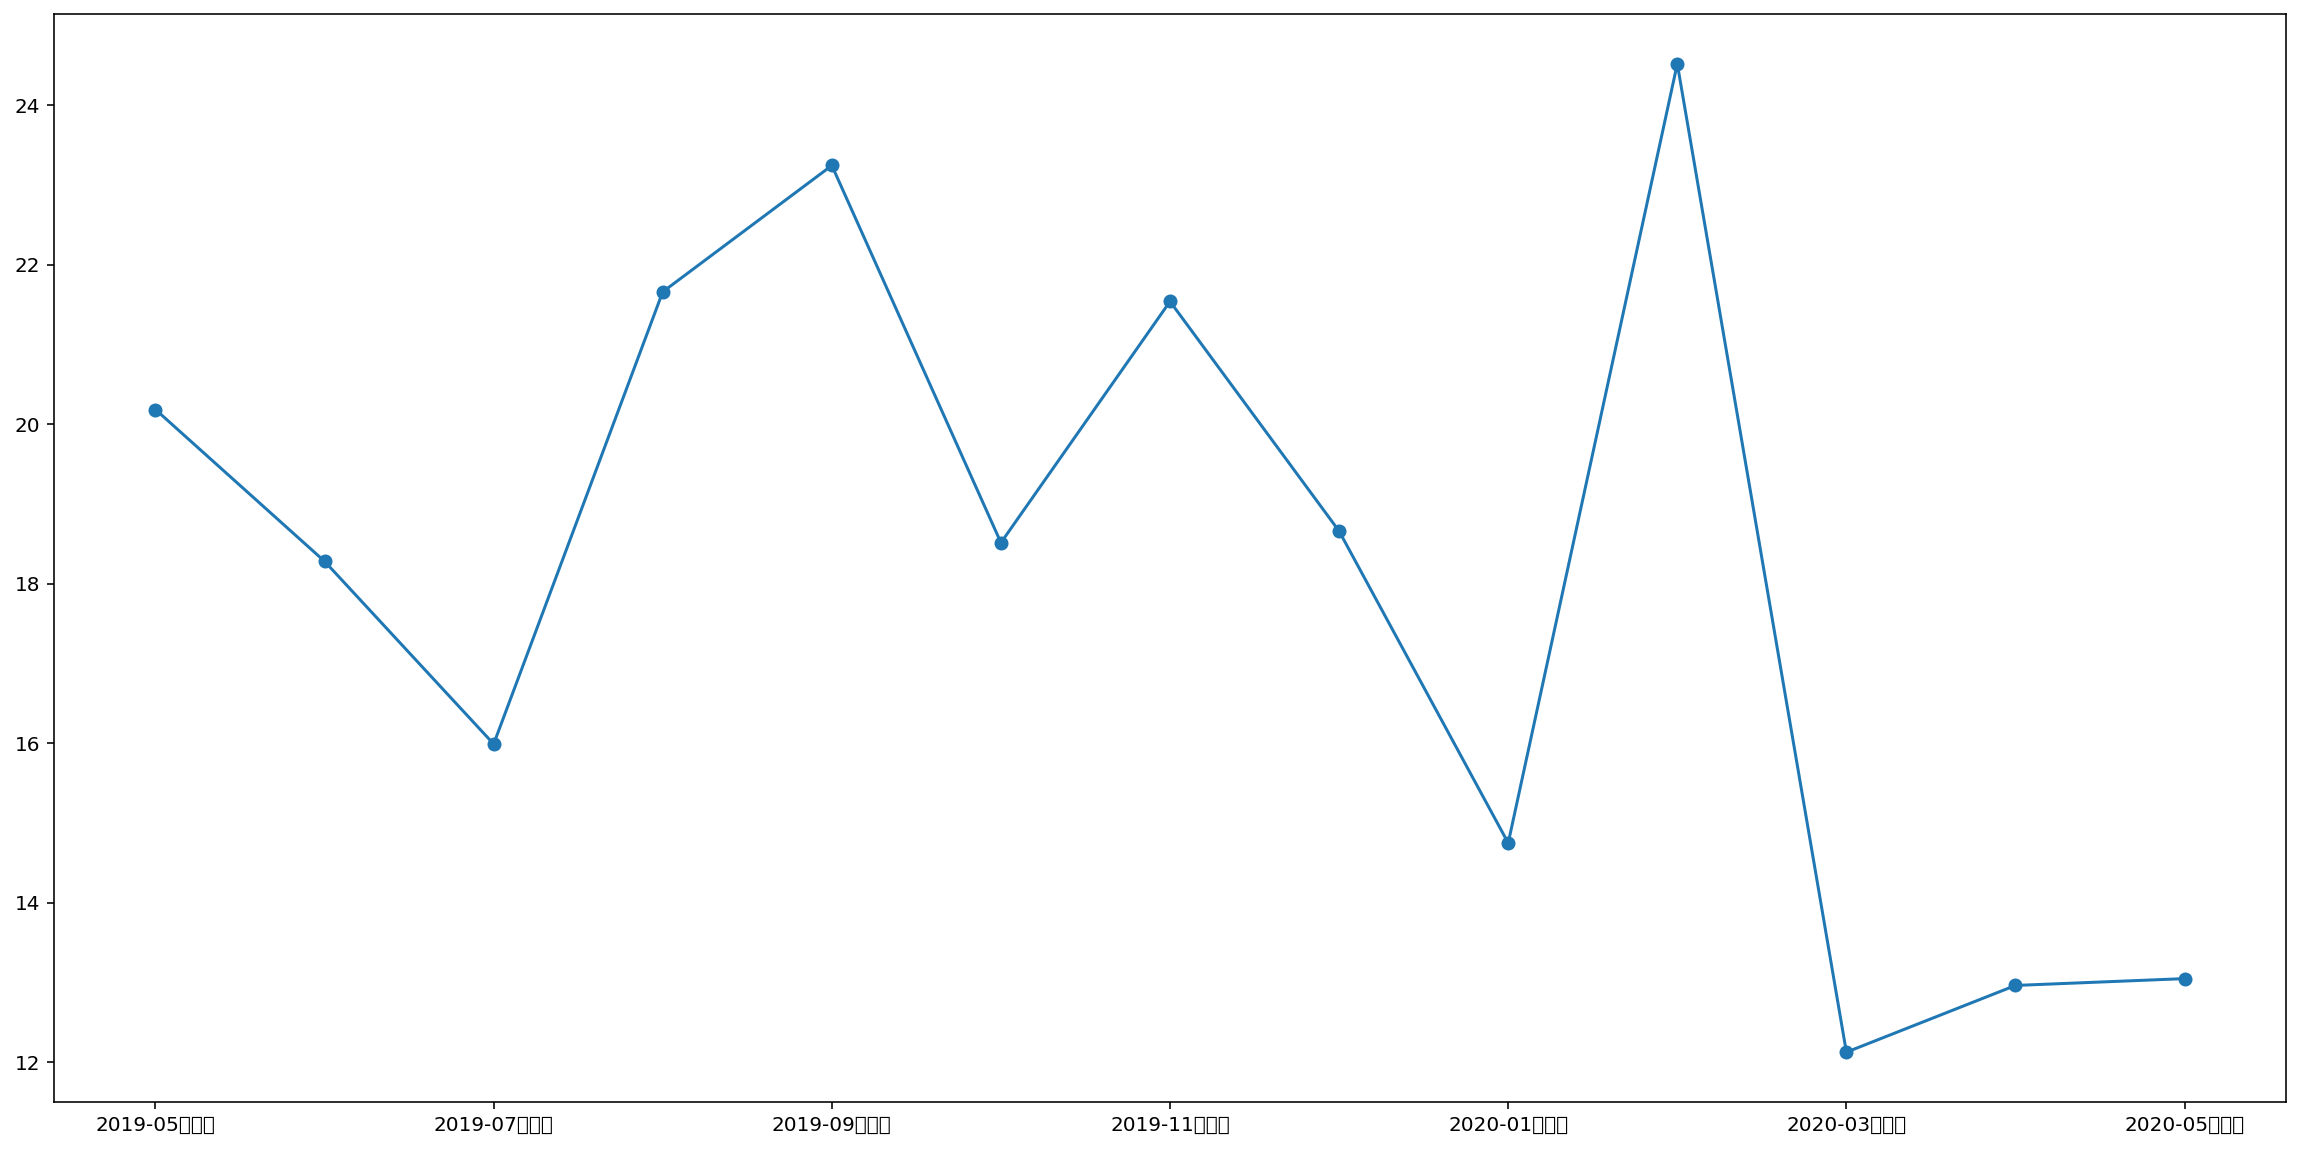

In [30]:
# 합계 증감율 시각화
Change_sales.합계.plot(figsize=(20,10), marker='o')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

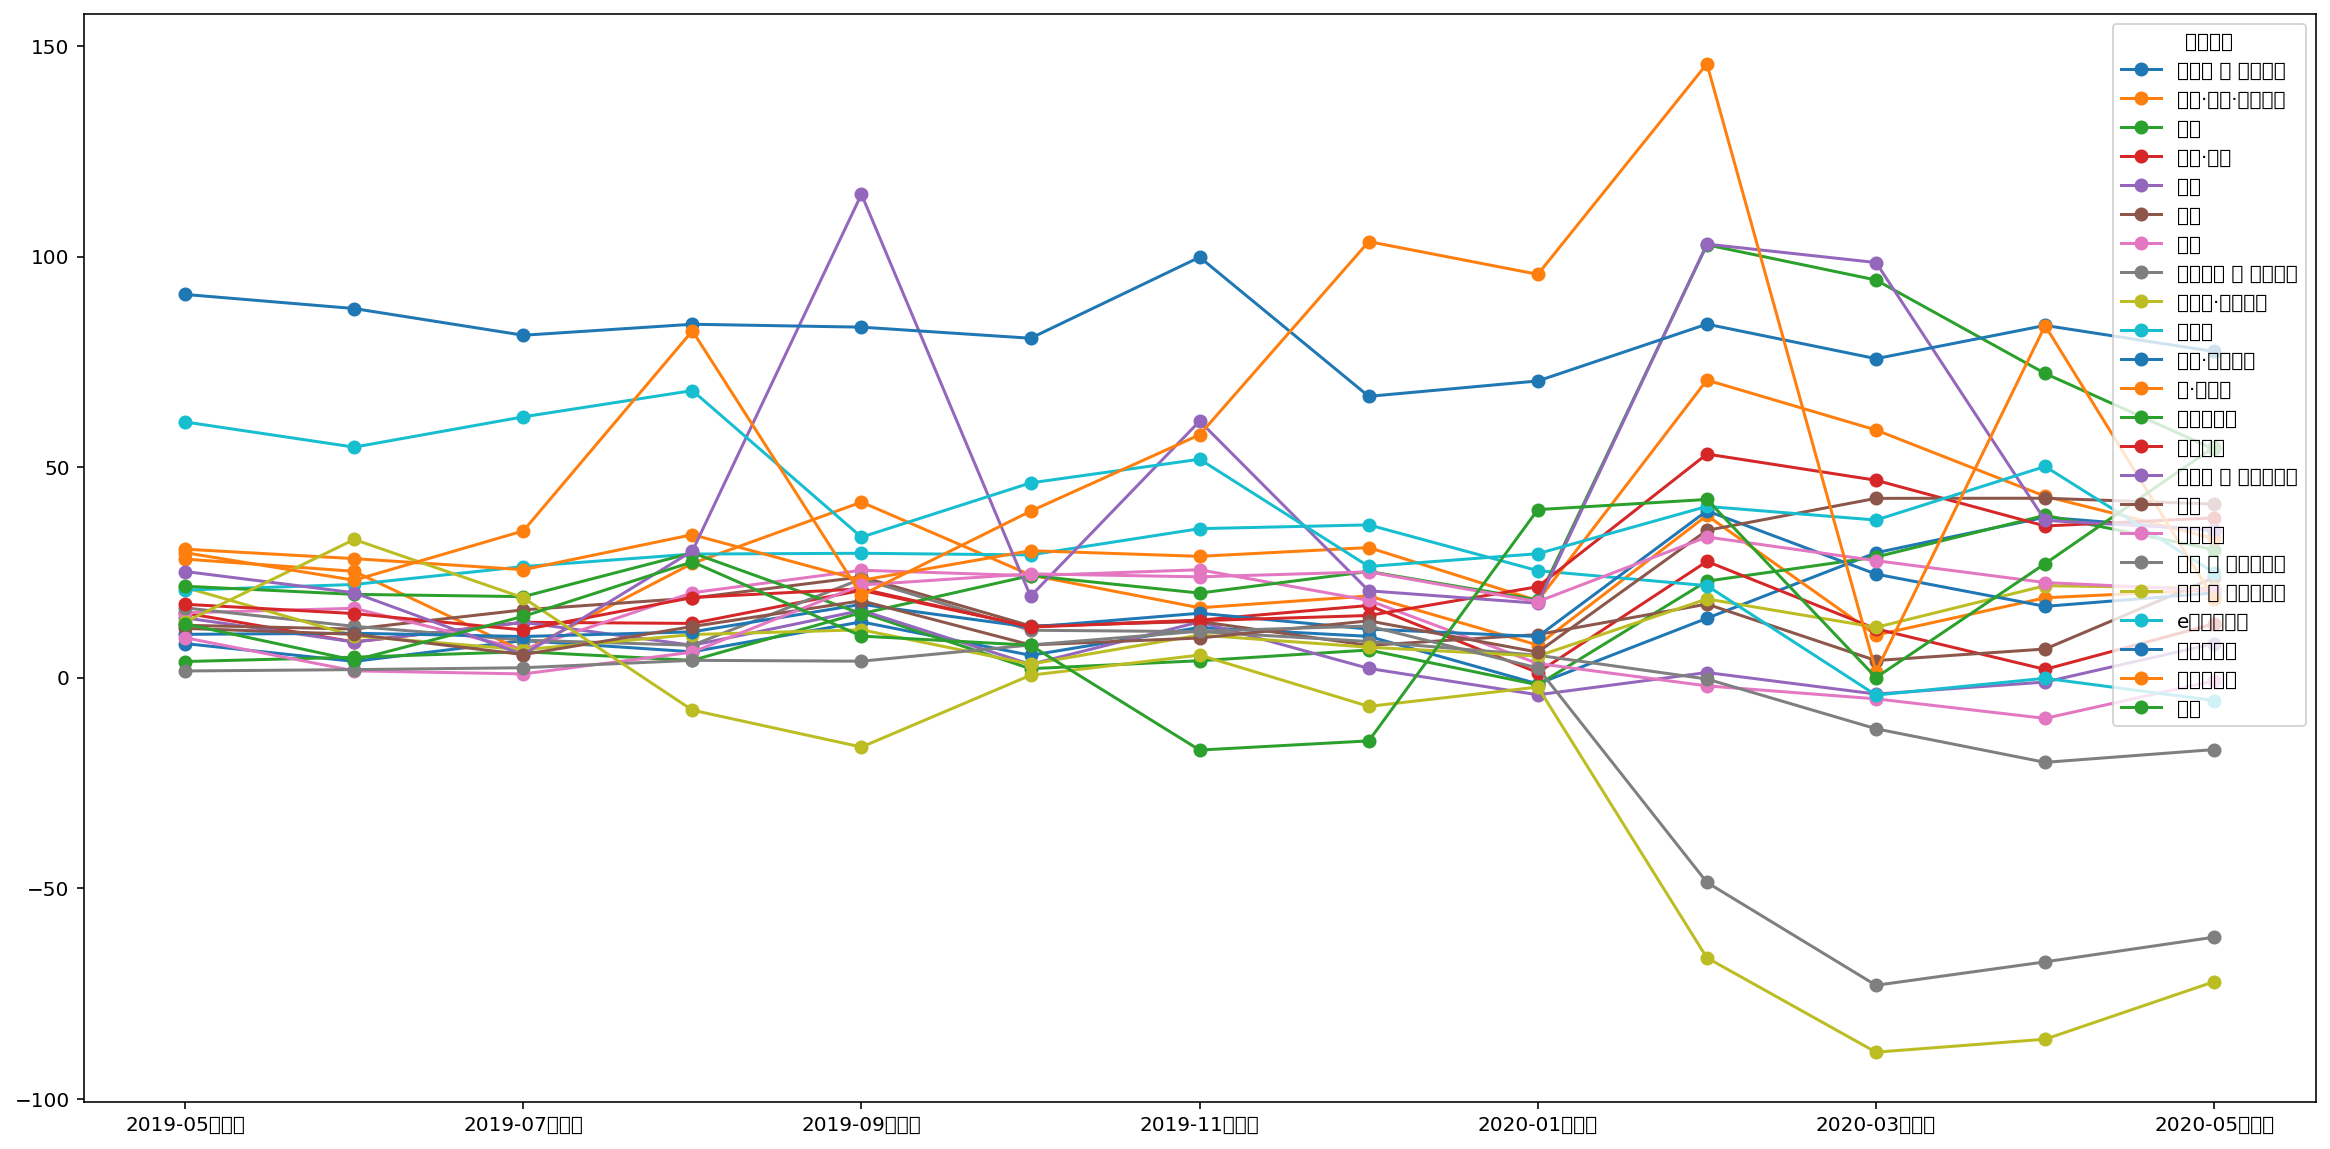

In [31]:
# 상품군별 증감율
Change_sales.iloc[:,1:].plot(figsize=(20,10), marker='o')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

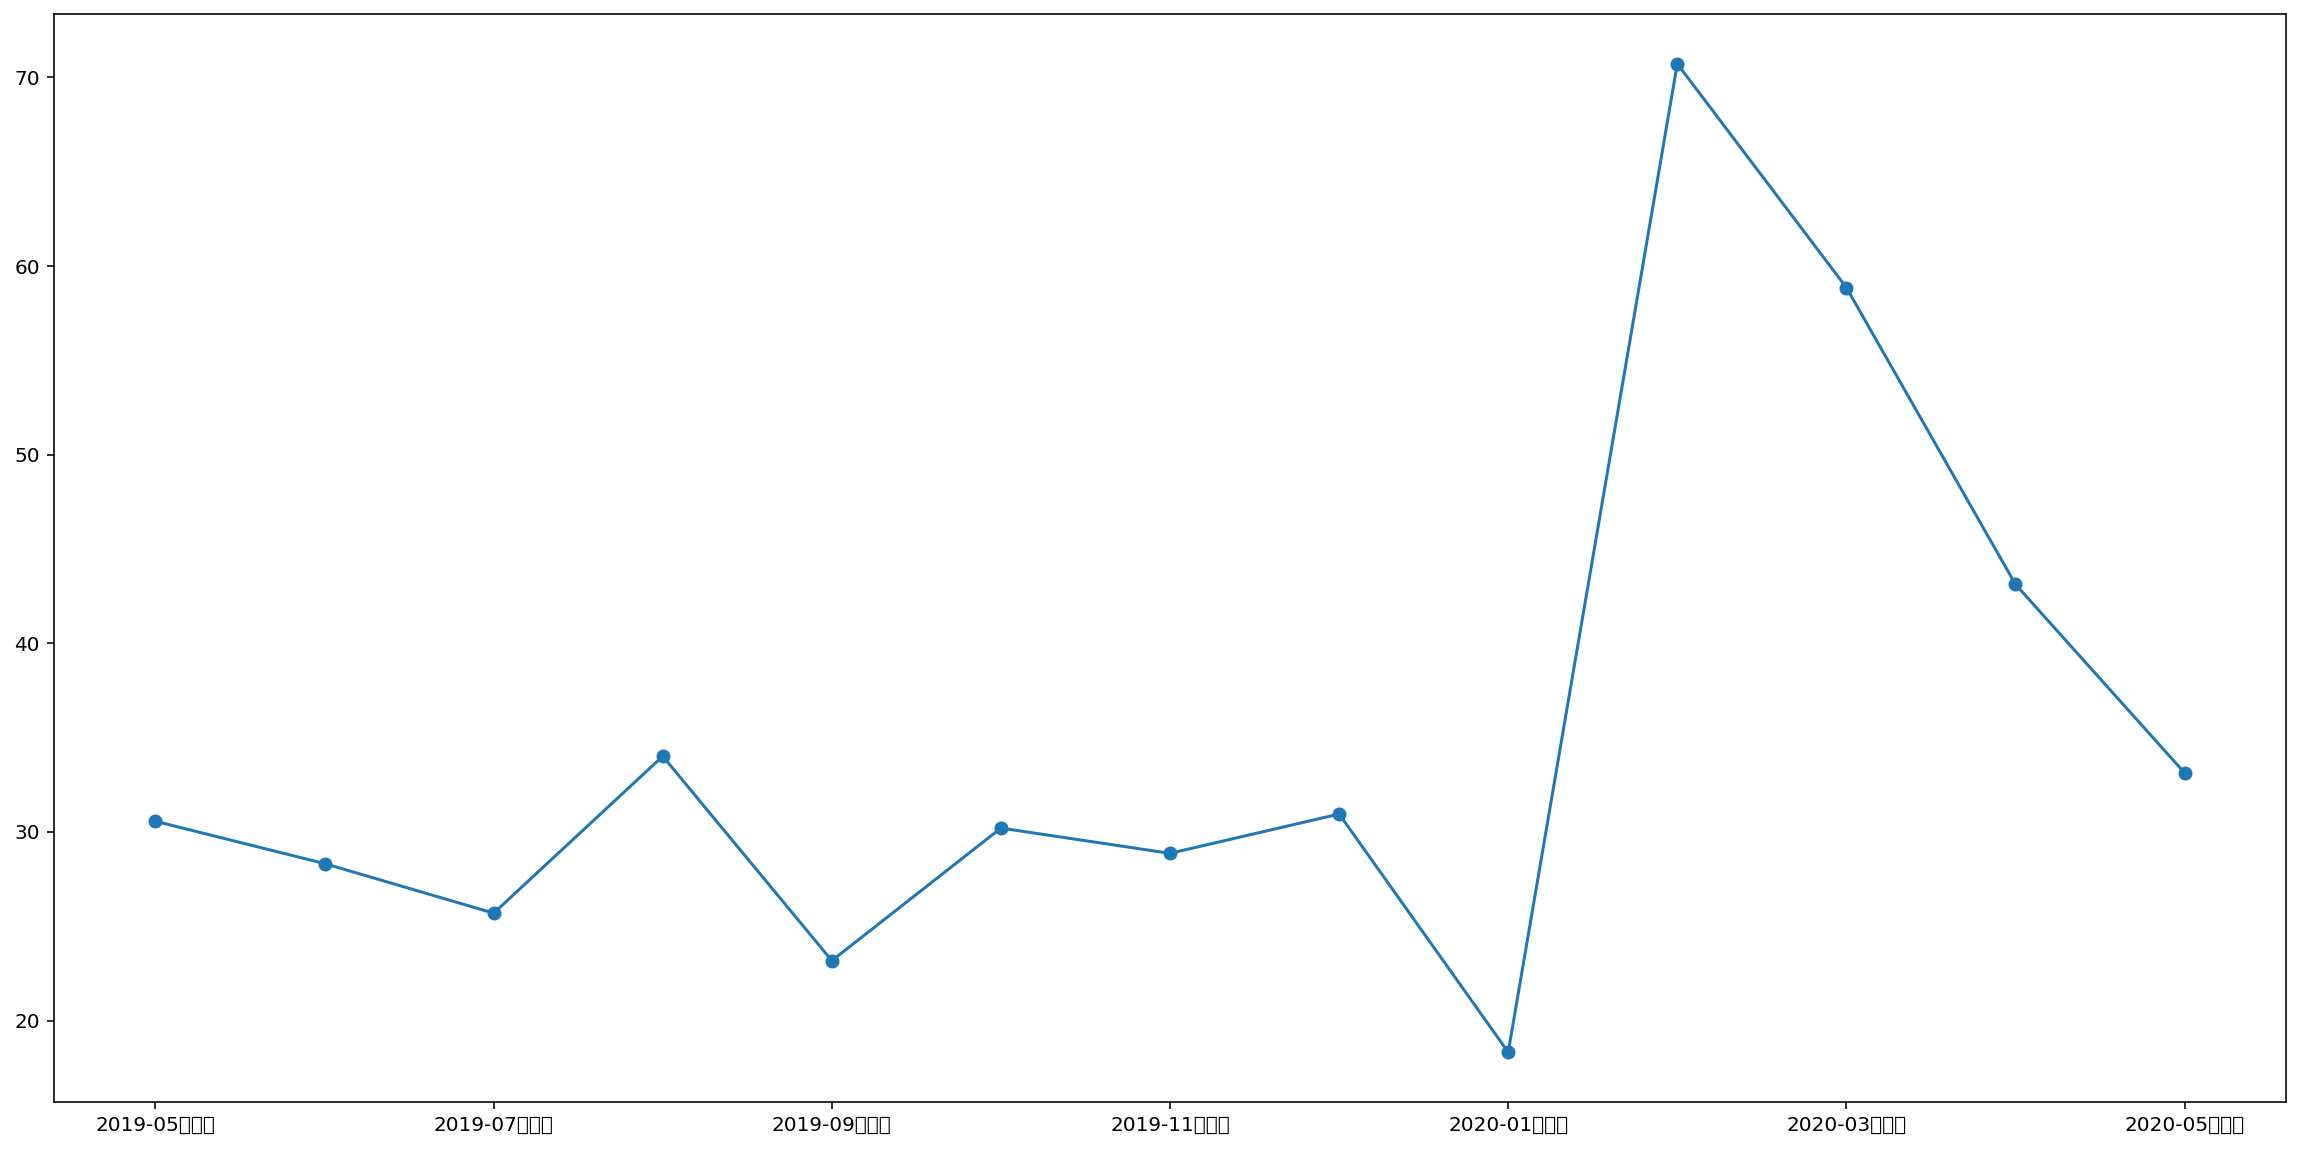

In [32]:
Change_sales['음·식료품'].plot(figsize=(20,10),marker='o')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

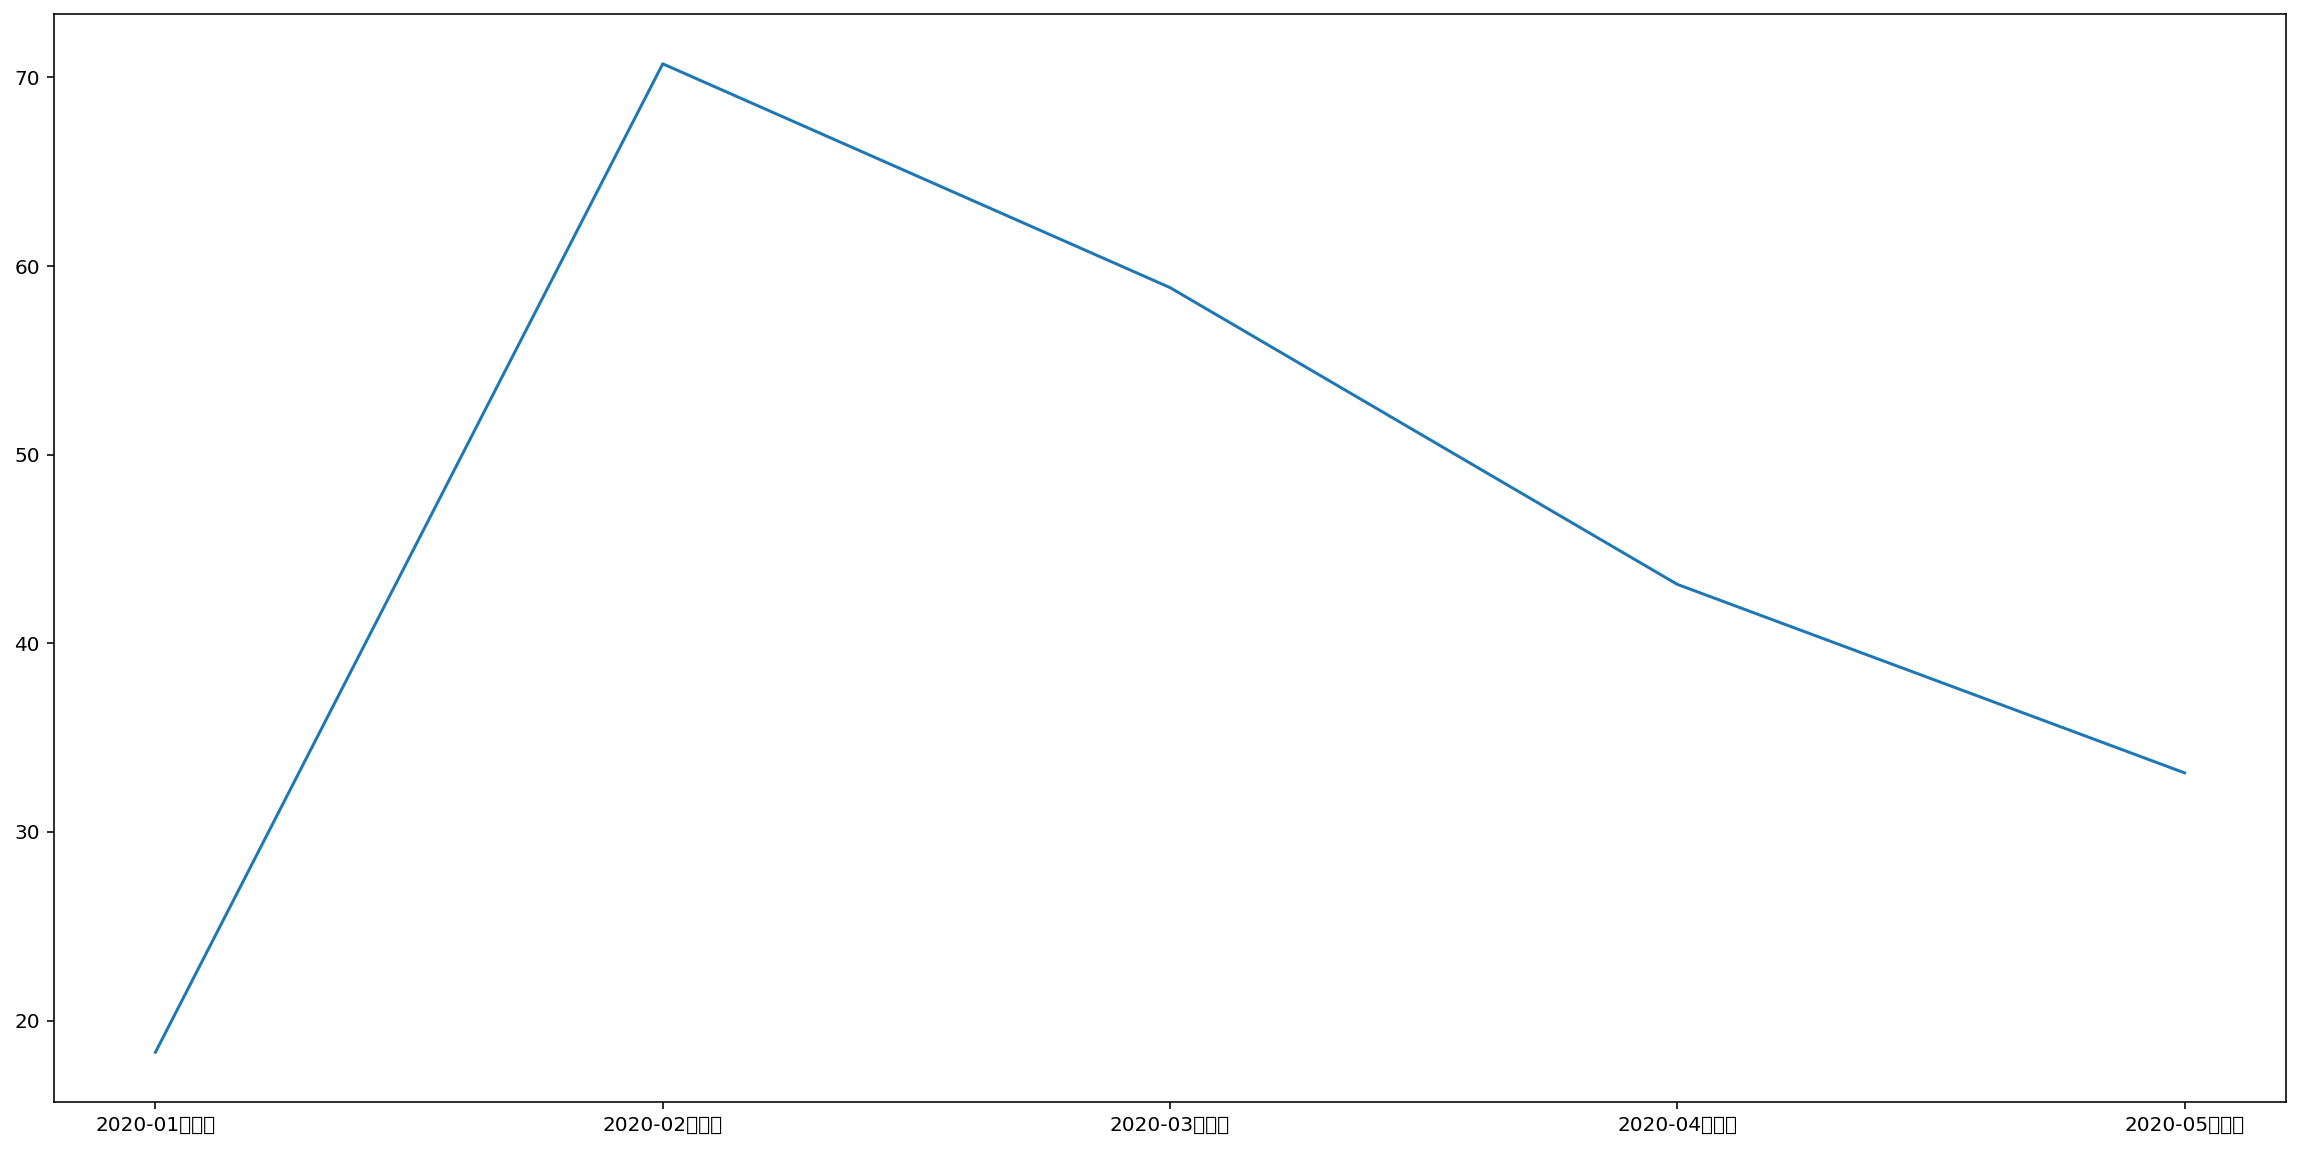

In [33]:
plt.figure(figsize=(20,10))
# plt.plot(Change_sales.음·식료품[:5])
plt.plot(Change_sales.음·식료품[-5:])

plt.show()

## 2019-01 ~ 2020-05 데이터만 분석

In [34]:
# 2019-01 ~ 2020-05 데이터 추출, OnlineShopping_2019_2020 df 생성
OnlineShopping_2019_2020 = OnlineShopping.loc['2019-01':, :]

In [35]:
OnlineShopping_2019_2020.index

Index(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05'],
      dtype='object')

In [36]:
OnlineShopping_2019_2020.dtypes

상품군별
합계             int64
컴퓨터 및 주변기기     int64
가전·전자·통신기기     int64
서적             int64
사무·문구          int64
의복             int64
신발             int64
가방             int64
패션용품 및 액세서리    int64
스포츠·레저용품       int64
화장품            int64
아동·유아용품        int64
음·식료품          int64
농축수산물          int64
생활용품           int64
자동차 및 자동차용품    int64
가구             int64
애완용품           int64
여행 및 교통서비스     int64
문화 및 레저서비스     int64
e쿠폰서비스         int64
음식서비스          int64
기타서비스          int64
기타             int64
dtype: object

In [37]:
OnlineShopping_2019_2020.columns

Index(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발', '가방',
       '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물', '생활용품',
       '자동차 및 자동차용품', '가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스', 'e쿠폰서비스',
       '음식서비스', '기타서비스', '기타'],
      dtype='object', name='상품군별')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54504 missing from current font.
  font.set_

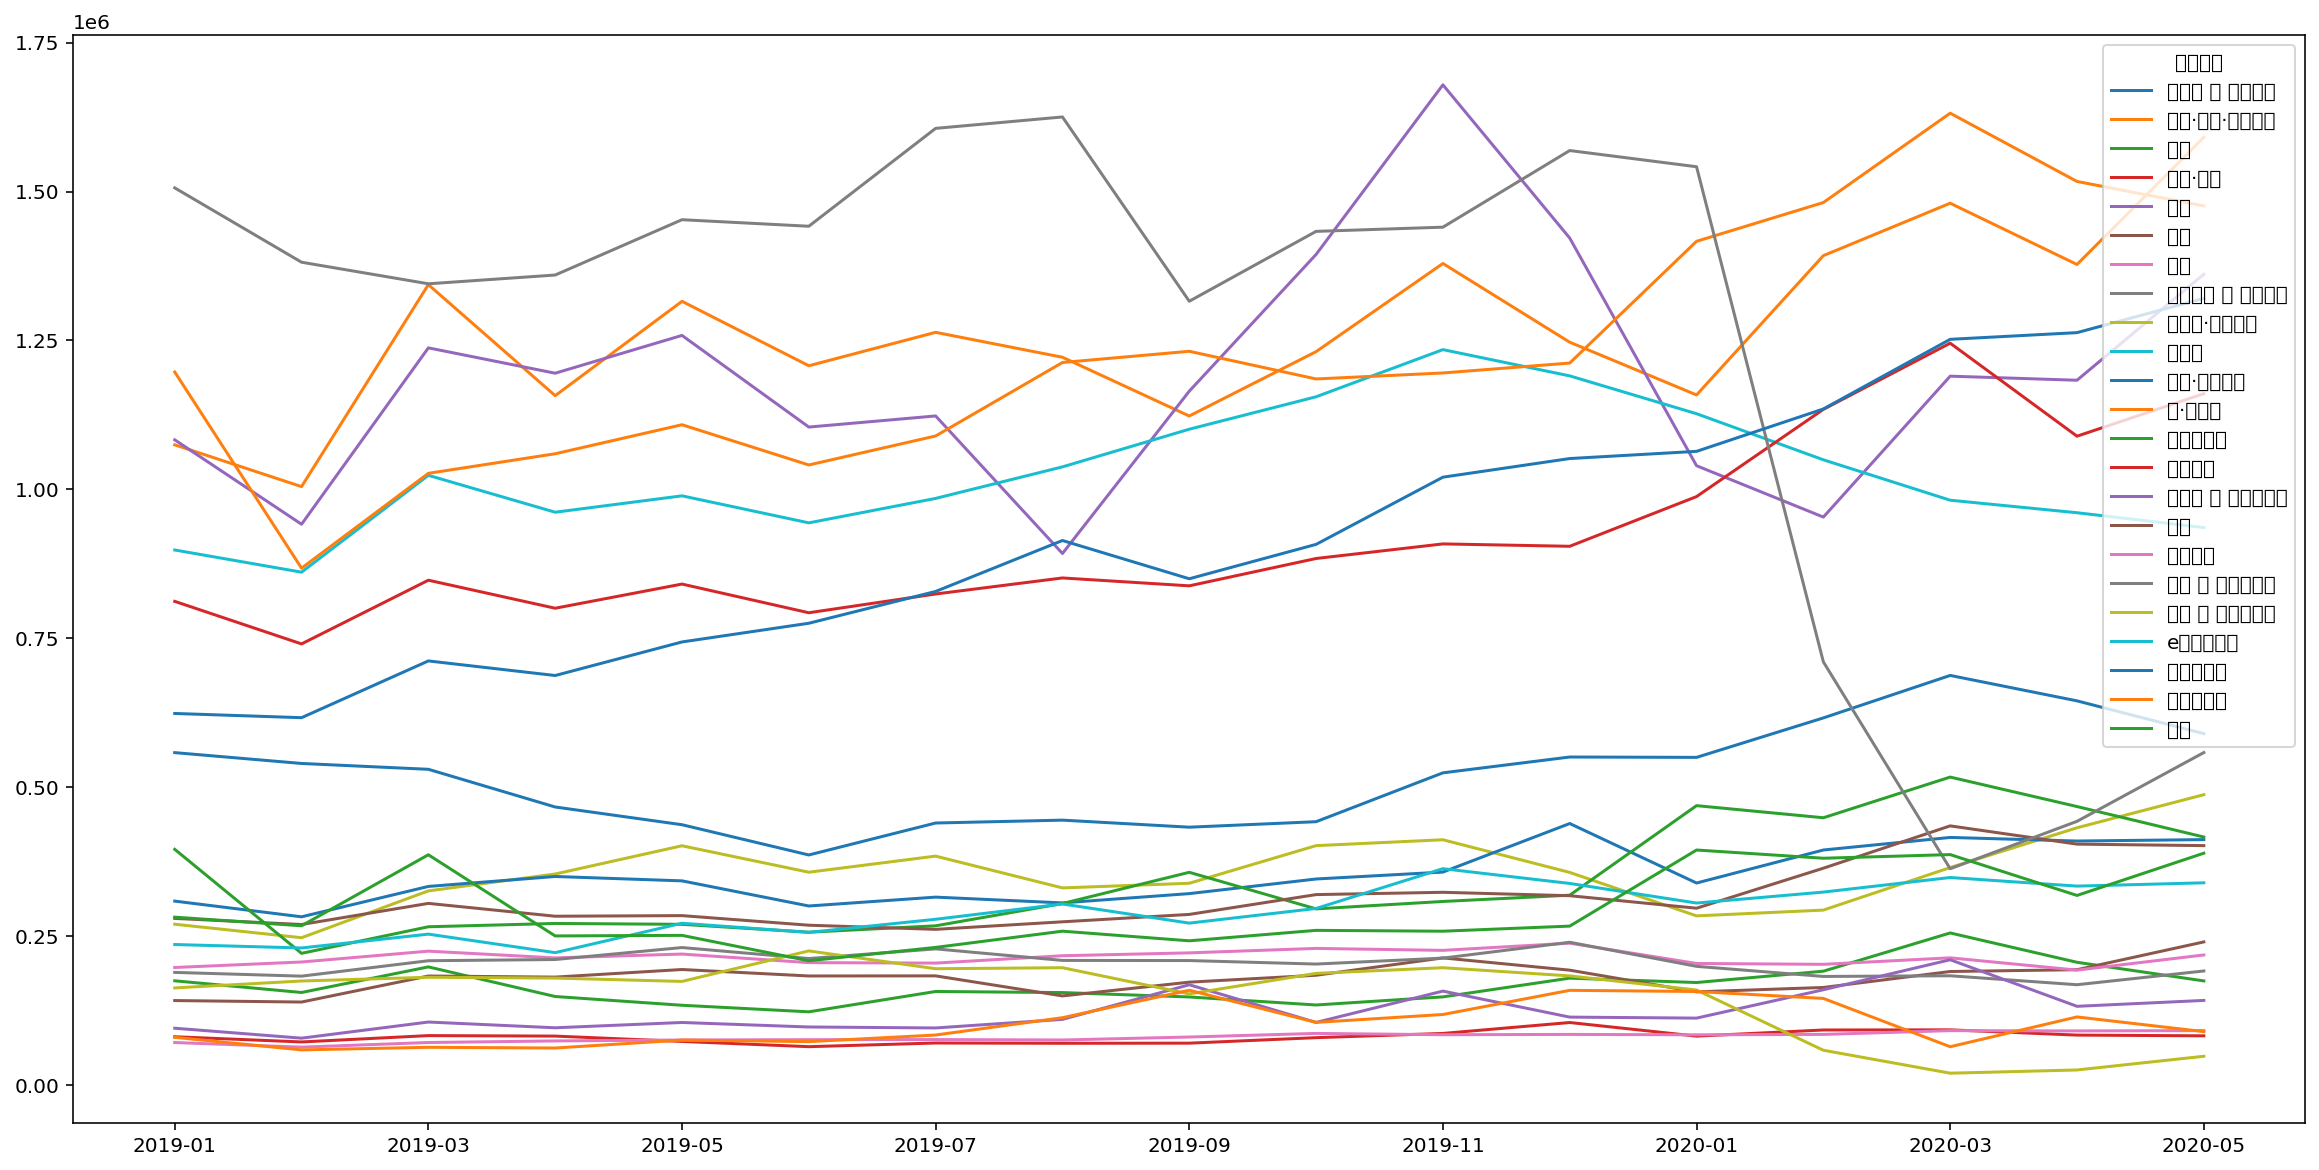

In [38]:
# 합계 데이터를 뺀 상품군별 매출 변화
OnlineShopping_2019_2020.iloc[:,1:].plot(figsize=(20,10))

In [39]:
# 2019-01 기준 상위 8개 상품군
# 로직 다시 짤 것
tmp = OnlineShopping_2019_2020.loc[:, ['여행 및 교통서비스', '가전·전자·통신기기', '음·식료품', '화장품', '생활용품', '컴퓨터 및 주변기기', '아동·유아용품', '의복']]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_

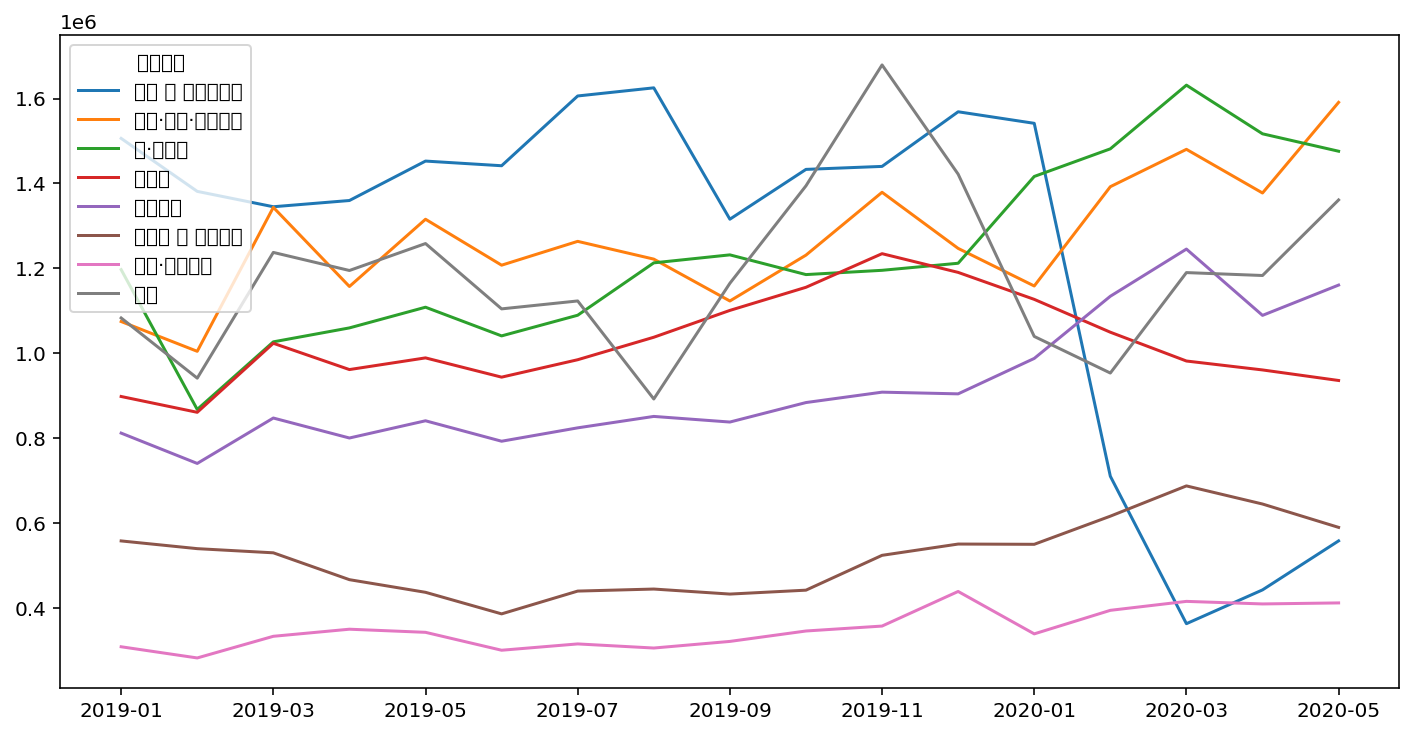

In [40]:
tmp.plot(figsize=(12,6))

In [41]:
a = list(OnlineShopping_2019_2020.index[:5])
b = list(OnlineShopping_2019_2020.index[-5:])
a, b

(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05'],
 ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05'])

In [42]:
# 월별 2019년 대비 2020년 결제금액 증감률
# 로직 다시 짤 것
Growth_Sales = pd.DataFrame(columns=OnlineShopping_2019_2020.columns)
for idx in range(0,len(a)):
  tmp = (OnlineShopping_2019_2020.loc[ b[idx] ] - OnlineShopping_2019_2020.loc[ a[idx] ]) / OnlineShopping_2019_2020.loc[ a[idx] ] * 100 
  Growth_Sales.loc[f'{b[idx]}증감률'] = tmp


In [43]:
# 월별 2019년 대비 2020년 결제금액 증감률 DF
Growth_Sales

상품군별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2020-01증감률,14.751254,-1.427307,7.788945,-1.647850,1.261931,-4.013825,10.295298,3.414970,5.375208,5.183620,25.462309,9.826775,18.324247,18.511053,21.654433,17.728627,6.114320,18.114383,2.356397,-2.171529,29.494386,70.514810,95.834475,39.959932
2020-02증감률,24.522429,14.159895,38.585862,22.979331,27.661715,1.277187,17.527517,-1.895817,-0.268280,18.736869,21.904400,39.675384,70.724689,102.840591,53.154467,103.005842,35.029698,33.464351,-48.564067,-66.472445,40.724837,84.004656,145.824541,42.374579
2020-03증감률,12.128328,29.716899,10.169471,28.707640,11.639646,-3.837968,4.120010,-4.972128,-12.081404,12.000503,-4.080747,24.648533,58.860657,94.487484,46.937769,98.634880,42.636355,27.838981,-72.991882,-88.880669,37.483533,75.804721,1.517845,0.075503
2020-04증감률,12.965182,38.151980,19.024977,38.595914,2.022041,-0.987334,6.855703,-9.610821,-20.055660,21.891328,-0.089736,16.991065,43.126820,72.288899,36.073019,37.396467,42.665519,22.639757,-67.431394,-85.799633,50.208351,83.698970,83.645369,27.130072
2020-05증감률,13.050778,34.972620,20.922819,30.469950,12.831129,8.159698,23.853698,-0.680637,-17.017657,21.330493,-5.380709,20.193791,33.133645,54.279016,37.992631,35.173941,41.277309,20.791466,-61.567792,-72.138846,24.971855,77.510935,18.678867,54.851769


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

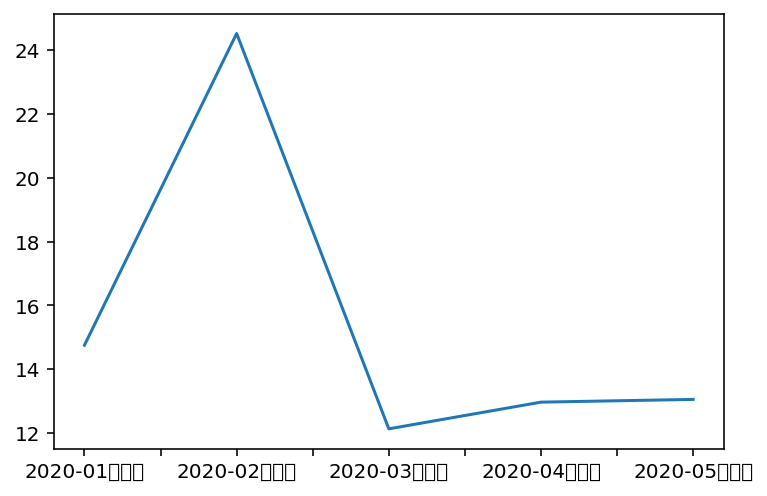

In [44]:
# 월별 2019년 대비 2020년 결제금액 상승률 차트
# 기간 1년으로 늘릴 것
Growth_Sales.합계.plot()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

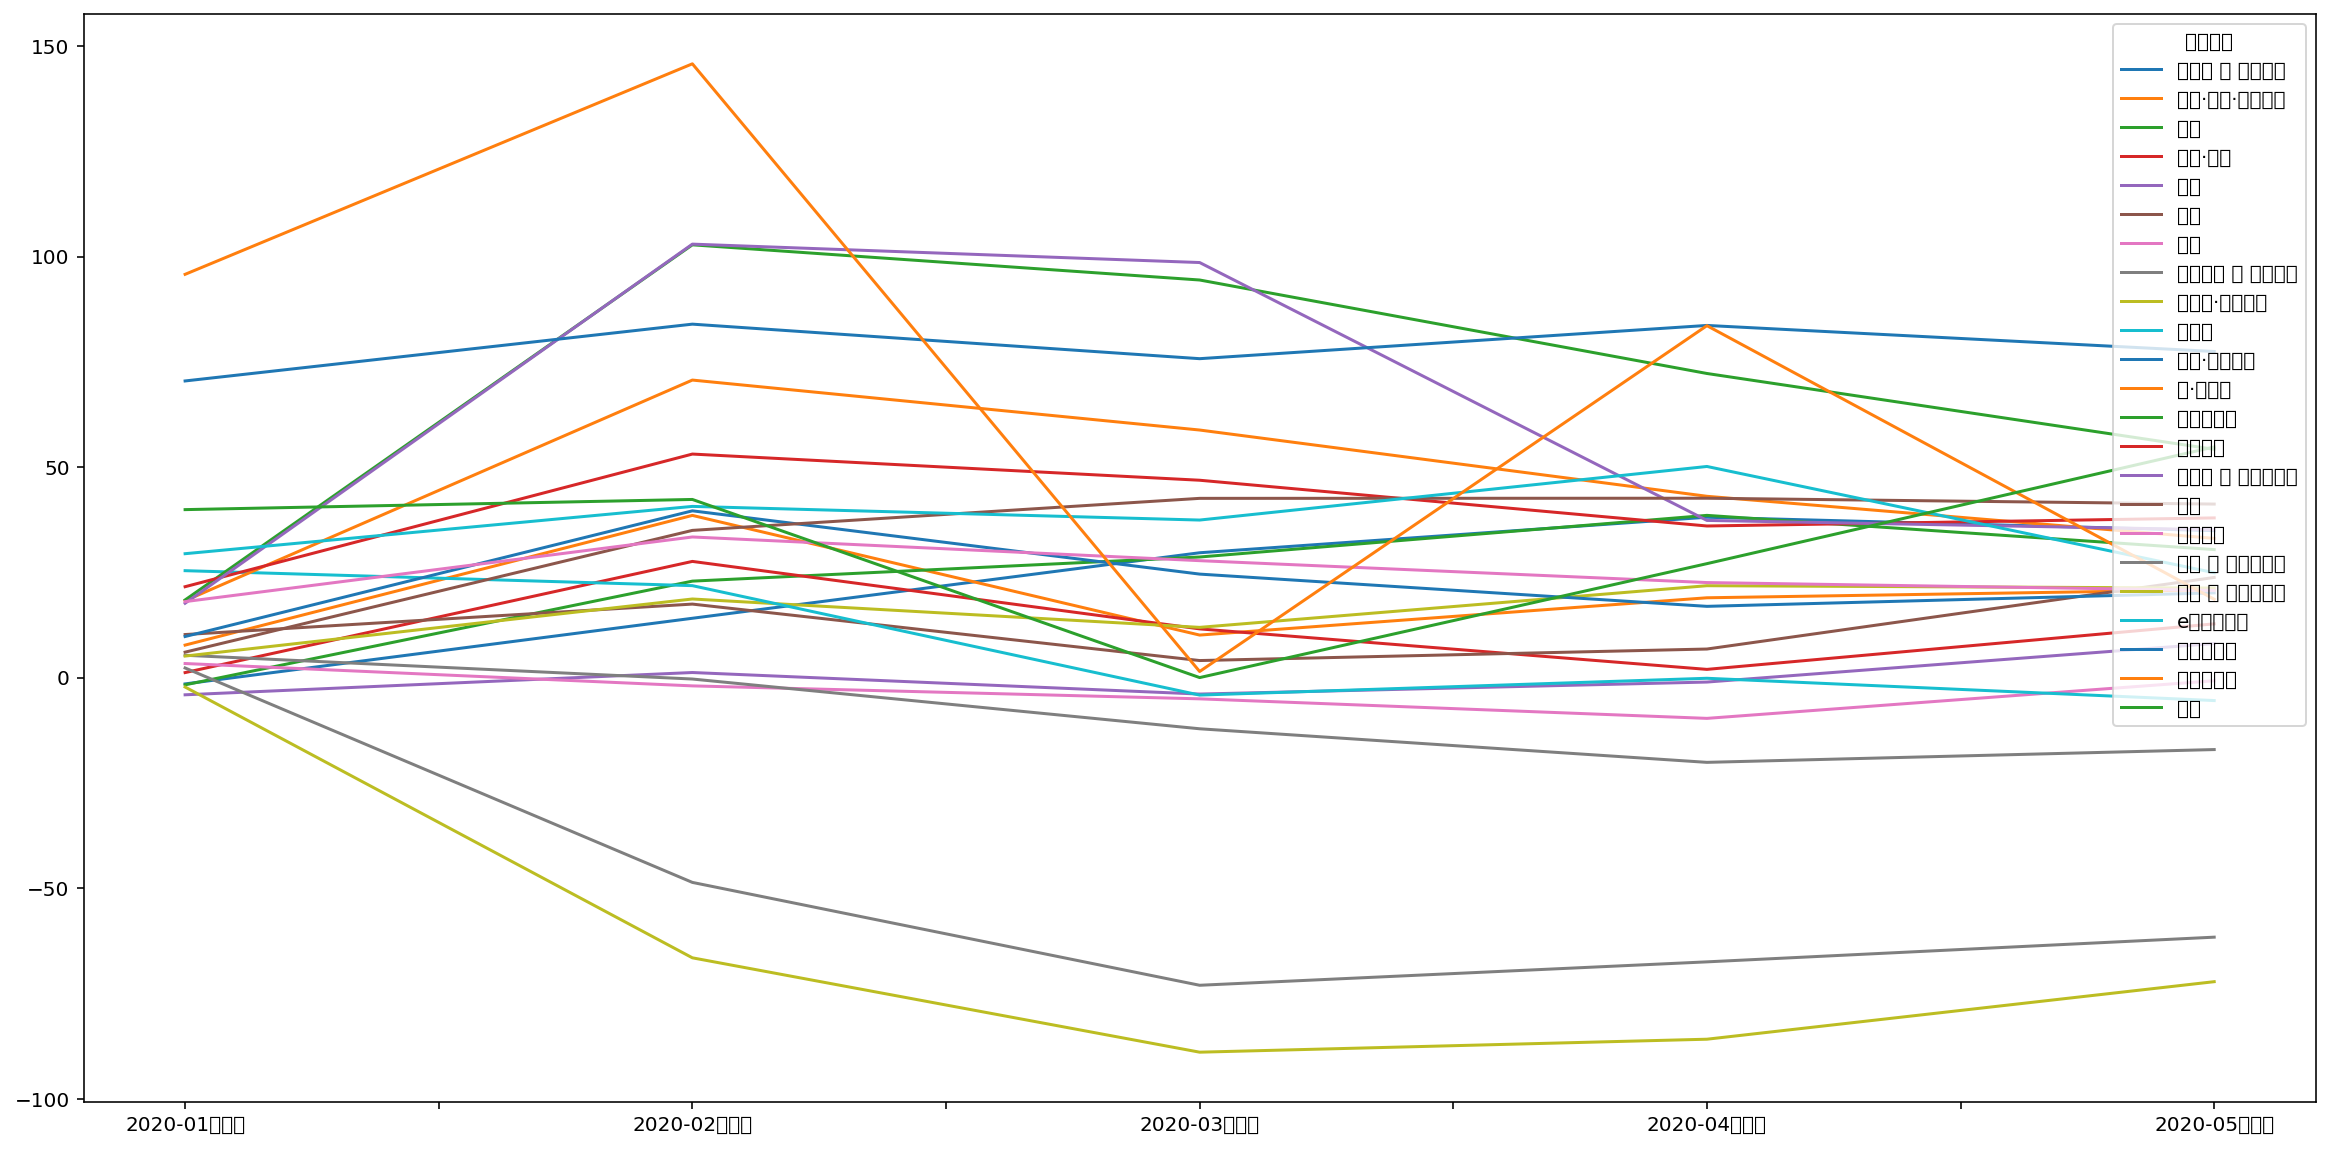

In [45]:
Growth_Sales.iloc[:,1:].plot(figsize=(20,10))

In [46]:
# index.csv 데이터 불러오기
path = '/content/drive/My Drive/Phoenix/Dacon_Data/index.csv'
off_cgi=pd.read_csv(path)

In [47]:
off_cgi.head()

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595


In [48]:
off_cgi.shape

(127525, 8)

In [49]:
off_cgi.sigungu.unique(), len(off_cgi.sigungu.unique())

(array(['관악구', '광진구', '도봉구', '동작구', '마포구', '성북구', '용산구', 'all', '강동구',
        '강서구', '금천구', '동대문구', '서대문구', '송파구', '종로구', '양천구', '영등포구', '은평구',
        '강북구', '구로구', '강남구', '노원구', '서초구', '중랑구', '중구', '성동구'],
       dtype=object), 26)

In [50]:
off_cgi.catl.unique()

array(['건강/의료용품', '식품', '일용품', '화장품'], dtype=object)

In [51]:
off_cgi.catm.unique()

array(['건강관리용품', '가공식품', '기호식품', '담배', '빙과류', '빵류', '신선식품', '유제품류', '음료',
       '제과류', '주류', '생활용품', '애완동물용품', '기타화장품', '바디/헤어용품', '뷰티소품', '화장품'],
      dtype=object)

In [52]:
off_cgi.loc[(off_cgi['sigungu'] == 'all') & (off_cgi['gender'] == 'all')].sort_values(by='catl')

,period,catl,catm,age,gender,sido,sigungu,cgi
17,201901,건강/의료용품,건강관리용품,20,all,서울,all,98.670511
41626,201906,건강/의료용품,건강관리용품,50,all,서울,all,109.196258
41011,201906,건강/의료용품,건강관리용품,40,all,서울,all,115.601595
108897,202003,건강/의료용품,건강관리용품,50,all,서울,all,83.018539
108272,202003,건강/의료용품,건강관리용품,40,all,서울,all,73.178058
...,...,...,...,...,...,...,...,...
87889,201912,화장품,기타화장품,60,all,서울,all,135.689046
88202,201912,화장품,뷰티소품,60,all,서울,all,86.508885
88224,201912,화장품,화장품,60,all,서울,all,88.836867
105437,202003,화장품,화장품,20,all,서울,all,83.272726


In [53]:
OnlineShopping.head()

상품군별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2018-01,9027008,511674,858256,171254,72870,964236,131568,186542,195299,230779,770908,295195,846822,251910,710430,77220,251892,72178,1491434,182387,105594,347457,73143,227959
2018-02,8207296,453408,770401,147783,71721,825152,124447,178154,178379,200710,746376,268618,814658,289778,636039,65502,241563,60944,1246049,151838,129231,324245,57680,224621
2018-03,9375766,504061,946627,191597,81900,1163132,169117,194190,210147,283820,831653,298883,826873,228800,739338,83898,277056,68634,1264187,171416,139594,361763,61834,277245
2018-04,9034274,409054,945259,144169,68006,1078268,169439,185469,196288,298574,802428,320420,810015,215400,709864,82601,260782,70338,1320458,164965,133138,365956,62168,221213
2018-05,9363224,404235,1026133,129125,63621,1101406,172582,190609,198073,330784,818526,310798,849044,221735,715962,84011,254665,69233,1429210,153740,169050,389395,58382,222905


In [54]:
OnlineShopping['음·식료품']/OnlineShopping['합계']*100

2018-01     9.380982
2018-02     9.926022
2018-03     8.819258
2018-04     8.966022
2018-05     9.067860
2018-06     9.048948
2018-07     8.980299
2018-08     9.763698
2018-09    10.944779
2018-10     9.089126
2018-11     8.772984
2018-12     8.658876
2019-01    11.163736
2019-02     9.032490
2019-03     9.121403
2019-04     9.931345
2019-05     9.850896
2019-06     9.817017
2019-07     9.731538
2019-08    10.754937
2019-09    10.938519
2019-10     9.985476
2019-11     9.301635
2019-12     9.555524
2020-01    11.511340
2020-02    12.383865
2020-03    12.922979
2020-04    12.583009
2020-05    11.600855
dtype: float64